# Ensemble Models

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import cross_val_predict



In [120]:
# Load in training data
X_train = pd.read_csv("https://raw.githubusercontent.com/hzheni/ML4021-final-project/refs/heads/main/Data/X_train.csv")

y_train = pd.read_csv("https://raw.githubusercontent.com/hzheni/ML4021-final-project/refs/heads/main/Data/y_train.csv")

# Flatten targets to 1D arrays for scikit-learn
y_train = y_train.values.ravel()


# Gradient Boosting Regressor

In [121]:
def regression_metrics(y_true, y_pred, label="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"=== {label} ===")
    print(f"MAE : {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R^2 : {r2:.3f}")
    print()


In [122]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)

gbr_pipeline = Pipeline([
    ("model", GradientBoostingRegressor(random_state=42))
])

gbr_param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__max_depth": [2, 3, 4],
    "model__subsample": [0.6, 1.0]
}

gbr_grid = GridSearchCV(
    estimator=gbr_pipeline,
    param_grid=gbr_param_grid,
    cv=kf,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

gbr_grid.fit(X_train, y_train)

best_gbr = gbr_grid.best_estimator_

print("Best estimator:", best_gbr)
print("Best Hyperparameters:", gbr_grid.best_params_)
print("Best CV MSE:", -gbr_grid.best_score_)
print("Best CV RMSE:", np.sqrt(-gbr_grid.best_score_))

# Cross-validated predictions for CV R^2
y_gbr_cv_pred = cross_val_predict(best_gbr, X_train, y_train, cv=kf, n_jobs=-1)
gbr_cv_r2 = r2_score(y_train, y_gbr_cv_pred)
print("Best CV R^2:", gbr_cv_r2)

# Evaluate best GBR on training data (optimistic reference)
y_gbr_train_pred = best_gbr.predict(X_train)
gbr_train_mse = mean_squared_error(y_train, y_gbr_train_pred)
gbr_train_r2 = r2_score(y_train, y_gbr_train_pred)
print(f"Training MSE: {gbr_train_mse:.4f}")
print(f"Training RMSE: {np.sqrt(gbr_train_mse):.4f}")
print(f"Training R^2: {gbr_train_r2:.4f}")



Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best estimator: Pipeline(steps=[('model',
                 GradientBoostingRegressor(learning_rate=0.01, random_state=42,
                                           subsample=0.6))])
Best Hyperparameters: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 100, 'model__subsample': 0.6}
Best CV MSE: 7.517374763889286
Best CV RMSE: 2.7417831358240727
Best CV R^2: 0.02367132924319315
Training MSE: 6.4411
Training RMSE: 2.5379
Training R^2: 0.1638


In [123]:
# Best Gradient Boosting model
best_gbr = gbr_grid.best_estimator_

# Predictions
gbr_train_pred = best_gbr.predict(X_train)

# Evaluate tuned GBR
regression_metrics(y_train, gbr_train_pred, "Gradient Boosting (Best, Train)")


=== Gradient Boosting (Best, Train) ===
MAE : 2.125
RMSE: 2.538
R^2 : 0.164



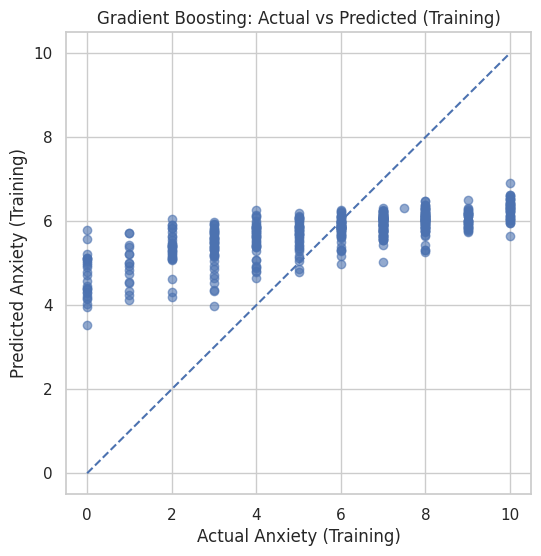

In [124]:
# Actual vs Predicted for TRAINING data

plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6)

line_min = min(y_train.min(), y_train_pred.min())
line_max = max(y_train.max(), y_train_pred.max())
plt.plot([line_min, line_max], [line_min, line_max], linestyle="--")

plt.xlabel("Actual Anxiety (Training)")
plt.ylabel("Predicted Anxiety (Training)")
plt.title("Gradient Boosting: Actual vs Predicted (Training)")
plt.savefig("../OUTPUT/GradientBoosting_actualvspredicted_train.png", dpi=300, bbox_inches='tight')
plt.show()

# Random Forest

In [125]:
def regression_metrics(y_true, y_pred, label="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"=== {label} ===")
    print(f"MAE : {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R^2 : {r2:.3f}")
    print()


In [126]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline([
    ("model", RandomForestRegressor(random_state=42))
])

rf_param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [None, 5, 10],
    "model__min_samples_leaf": [1, 3, 5],
    "model__max_features": ["sqrt", "log2"]
}

rf_grid = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    cv=kf,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_

print("Best estimator:", best_rf)
print("Best Hyperparameters:", rf_grid.best_params_)
print("Best CV MSE:", -rf_grid.best_score_)
print("Best CV RMSE:", np.sqrt(-rf_grid.best_score_))

# Cross-validated predictions for CV R^2
y_rf_cv_pred = cross_val_predict(best_rf, X_train, y_train, cv=kf, n_jobs=-1)
rf_cv_r2 = r2_score(y_train, y_rf_cv_pred)
print("Best CV R^2:", rf_cv_r2)

# Evaluate best RF on training data
y_rf_train_pred = best_rf.predict(X_train)
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
print(f"Training MSE: {rf_train_mse:.4f}")
print(f"Training RMSE: {np.sqrt(rf_train_mse):.4f}")
print(f"Training R^2: {rf_train_r2:.4f}")


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best estimator: Pipeline(steps=[('model',
                 RandomForestRegressor(max_depth=10, max_features='log2',
                                       n_estimators=200, random_state=42))])
Best Hyperparameters: {'model__max_depth': 10, 'model__max_features': 'log2', 'model__min_samples_leaf': 1, 'model__n_estimators': 200}
Best CV MSE: 7.503137295021638
Best CV RMSE: 2.7391855167223773
Best CV R^2: 0.02556265446604644
Training MSE: 2.5759
Training RMSE: 1.6050
Training R^2: 0.6656


In [127]:
# Best model from GridSearchCV
best_rf = rf_grid.best_estimator_

# Prediction
y_train_pred = best_rf.predict(X_train)

regression_metrics(y_train, y_train_pred, "Random Forest (Best, Train)")


=== Random Forest (Best, Train) ===
MAE : 1.354
RMSE: 1.605
R^2 : 0.666



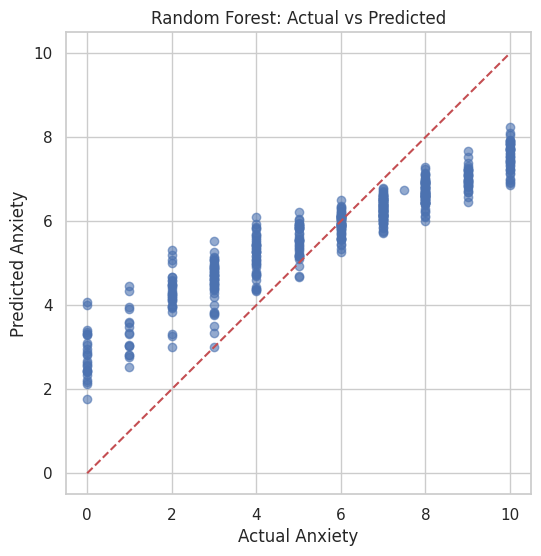

In [128]:
y_rf_train_pred = best_rf.predict(X_train)

plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_rf_train_pred, alpha=0.6)

line_min = min(y_train.min(), y_rf_train_pred.min())
line_max = max(y_train.max(), y_rf_train_pred.max())
plt.plot([line_min, line_max], [line_min, line_max], "r--")

plt.xlabel("Actual Anxiety")
plt.ylabel("Predicted Anxiety")
plt.title("Random Forest: Actual vs Predicted")
plt.savefig("../OUTPUT/RF_train_actualvspredicted.png", dpi=300, bbox_inches="tight")
plt.show()


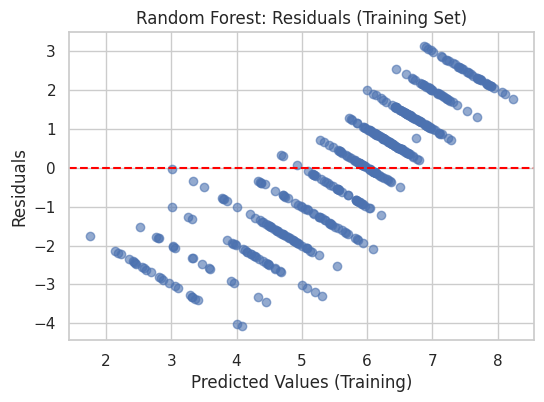

In [129]:
residuals_train = y_train - y_rf_train_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_rf_train_pred, residuals_train, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")

plt.xlabel("Predicted Values (Training)")
plt.ylabel("Residuals")
plt.title("Random Forest: Residuals (Training Set)")
plt.savefig("../OUTPUT/RF_residuals_train.png", dpi=300, bbox_inches="tight")
plt.show()



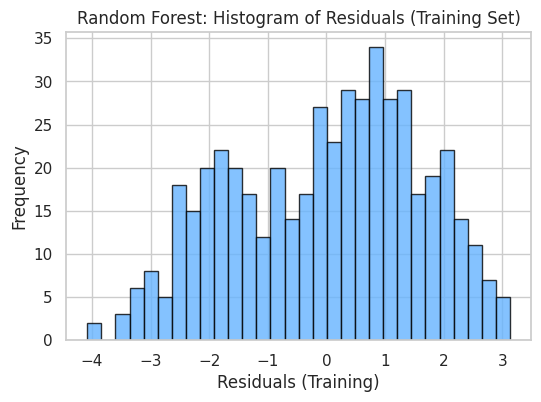

In [130]:
residuals_train = y_train - y_rf_train_pred

plt.figure(figsize=(6, 4))
plt.hist(residuals_train, bins=30, color="#66b3ff", edgecolor="black", alpha=0.8)

plt.xlabel("Residuals (Training)")
plt.ylabel("Frequency")
plt.title("Random Forest: Histogram of Residuals (Training Set)")
plt.savefig("../OUTPUT/RF_residualhist_train.png", dpi=300, bbox_inches="tight")
plt.show()


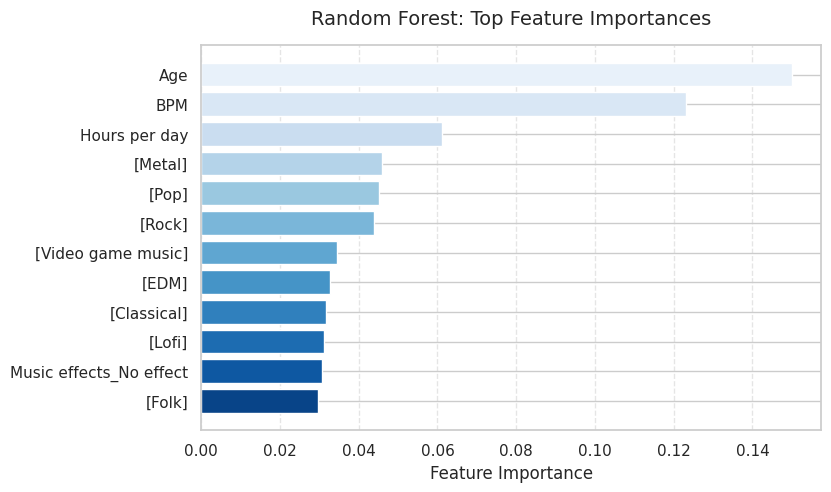

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

# Sort importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

top_k = 12  # show top 12 features
top_features = X_train.columns[indices][:top_k]
top_values = importances[indices][:top_k]

plt.figure(figsize=(8, 5))

colors = sns.color_palette("Blues_r", top_k)
plt.barh(
    y=np.arange(top_k),
    width=top_values[::-1],
    color=colors)

plt.yticks(np.arange(top_k), [label.replace("Frequency ", "") for label in top_features[::-1]])

plt.xlabel("Feature Importance", fontsize=12)
plt.title("Random Forest: Top Feature Importances", fontsize=14, pad=15)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.savefig("../OUTPUT/RF_featureimportance.png", dpi=300, bbox_inches='tight')
plt.show()
